In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import datetime as dt 
from datetime import datetime, timedelta
import warnings
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
sns.set()

In [2]:
Procedure_66982_data = pd.read_csv("Procedure_66982.csv", encoding='latin-1')
Procedure_66982_data.head()

,ï»¿Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003013533,Cioffi,George,A,MD,M,I,635 W 165th St,NaN,New York,...,"Removal of cataract with insertion of lens, co...",N,F,19,22,22,"$6,550.00",$883.37,$708.94,$588.71
1,1003017468,Smith,Ryan,T,MD,M,I,1330 Interstate Pkwy,NaN,Augusta,...,"Removal of cataract with insertion of lens, co...",N,F,20,22,22,"$2,875.00",$679.40,$537.69,$554.72
2,1003019092,Hawthorne,Kristen,M,M.D.,F,I,2610 S Ih 35,NaN,Austin,...,"Removal of cataract with insertion of lens, co...",N,F,14,17,17,"$1,300.00",$690.30,$556.07,$606.02
3,1003034034,Gordon,Susan,M,M.D.,F,I,1140 White Horse Rd,Suite1,Voorhees,...,"Removal of cataract with insertion of lens, co...",N,F,42,58,58,"$3,000.00",$814.88,$650.95,$587.78
4,1003034927,Bhatia,Sandeep,K,M.D.,M,I,20303 Crawford Ave Ste Ll1,NaN,Olympia Fields,...,"Removal of cataract with insertion of lens, co...",N,F,14,18,18,"$3,365.11",$727.37,$581.89,$539.65


In [3]:
Procedure_66982_data.describe
Procedure_66982_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ï»¿Rndrng_NPI                  4982 non-null   int64  
 1   Rndrng_Prvdr_Last_Org_Name     4982 non-null   object 
 2   Rndrng_Prvdr_First_Name        3683 non-null   object 
 3   Rndrng_Prvdr_MI                2965 non-null   object 
 4   Rndrng_Prvdr_Crdntls           3604 non-null   object 
 5   Rndrng_Prvdr_Gndr              3683 non-null   object 
 6   Rndrng_Prvdr_Ent_Cd            4982 non-null   object 
 7   Rndrng_Prvdr_St1               4982 non-null   object 
 8   Rndrng_Prvdr_St2               1544 non-null   object 
 9   Rndrng_Prvdr_City              4982 non-null   object 
 10  Rndrng_Prvdr_State_Abrvtn      4982 non-null   object 
 11  Rndrng_Prvdr_State_FIPS        4982 non-null   int64  
 12  Rndrng_Prvdr_Zip5              4982 non-null   i

In [4]:
Procedure_66982_data.isnull

<bound method DataFrame.isnull of       ï»¿Rndrng_NPI Rndrng_Prvdr_Last_Org_Name Rndrng_Prvdr_First_Name  \
0        1003013533                     Cioffi                  George   
1        1003017468                      Smith                    Ryan   
2        1003019092                  Hawthorne                 Kristen   
3        1003034034                     Gordon                   Susan   
4        1003034927                     Bhatia                 Sandeep   
...             ...                        ...                     ...   
4977     1992932776                      Routh                  Robert   
4978     1992954259                Leoncavallo                 Anthony   
4979     1992964837                     Ailani                  Haresh   
4980     1992971519                    Qureshi                  Joseph   
4981     1992976146                      Huang                   Harry   

     Rndrng_Prvdr_MI Rndrng_Prvdr_Crdntls Rndrng_Prvdr_Gndr  \
0             

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fraud_data = Procedure_66982_data.drop(['ï»¿Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
                                 'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
                                 'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
                                 'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS',
                                 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry',
                                 'Rndrng_Prvdr_Type', 'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind',
                                 'Place_Of_Srvc'], axis=1)

fraud_data_cleaned = fraud_data.dropna()

numerical_cols = fraud_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = fraud_data_cleaned.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols

fraud_data_cleaned['Tot_Srvcs'] = pd.to_numeric(fraud_data_cleaned['Tot_Srvcs'], errors='coerce')
fraud_data_cleaned['Avg_Sbmtd_Chrg'] = fraud_data_cleaned['Avg_Sbmtd_Chrg'].replace('[\$,]', '', regex=True).astype(float)
fraud_data_cleaned['Avg_Mdcr_Alowd_Amt'] = fraud_data_cleaned['Avg_Mdcr_Alowd_Amt'].replace('[\$,]', '', regex=True).astype(float)
fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'] = fraud_data_cleaned['Avg_Mdcr_Pymt_Amt'].replace('[\$,]', '', regex=True).astype(float)
fraud_data_cleaned['Avg_Mdcr_Stdzd_Amt'] = fraud_data_cleaned['Avg_Mdcr_Stdzd_Amt'].replace('[\$,]', '', regex=True).astype(float)

fraud_data_cleaned.dtypes

Rndrng_Prvdr_RUCA                float64
Rndrng_Prvdr_Mdcr_Prtcptg_Ind     object
Tot_Benes                          int64
Tot_Srvcs                        float64
Tot_Bene_Day_Srvcs                 int64
Avg_Sbmtd_Chrg                   float64
Avg_Mdcr_Alowd_Amt               float64
Avg_Mdcr_Pymt_Amt                float64
Avg_Mdcr_Stdzd_Amt               float64
dtype: object

In [6]:
Procedure_66982_data.to_csv('cleaned_Procedure_66982_data.csv', index=False)

In [7]:
df1=pd.read_csv('cleaned_Procedure_66982_data.csv')
Procedure_eighty_data_train, Procedure_twenty_data_test = train_test_split(df1, 
                                                         random_state=104, 
                                                         test_size=0.20, 
                                                         shuffle=True)
Procedure_eighty_data_train.to_csv('Procedure(66982)_80_data.csv',index=False)
Procedure_twenty_data_test.to_csv('Procedure(66982)_20_data.csv',index=False)

In [8]:
csv_file_path = 'Procedure(66982)_80_data.csv'
columns_to_convert = ['Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Stdzd_Amt']

data = pd.read_csv(csv_file_path)

# Convert currency formatted columns to floats
for column in columns_to_convert:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

# Select and rename the columns you need
data_for_var = data[['Tot_Benes', 'Tot_Srvcs', 'Avg_Mdcr_Stdzd_Amt']].rename(columns={
    'Tot_Benes': 'Tot_Benes',
    'Tot_Srvcs': 'Tot_Srvcs',
    'Avg_Mdcr_Stdzd_Amt': 'Avg_Mdcr_Stdzd_Amt'
})

# Ensure all data is in numeric form and drop any rows with NaN values
data_for_var = data_for_var.apply(pd.to_numeric, errors='coerce').dropna()

print(data_for_var.head())
print(data_for_var.dtypes)

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt
0         28       32.0              581.89
1         29       38.0              771.93
2         11       12.0              562.18
3         13       22.0              117.75
4         12       16.0              588.58
Tot_Benes               int64
Tot_Srvcs             float64
Avg_Mdcr_Stdzd_Amt    float64
dtype: object


In [9]:
data_for_var['Tot_Benes_standard_normal_variate'] = (data_for_var['Tot_Benes'] - data_for_var['Tot_Benes'].mean()) / data_for_var['Tot_Benes'].std()
data_for_var['Tot_Srvcs_standard_normal_variate'] = (data_for_var['Tot_Srvcs'] - data_for_var['Tot_Srvcs'].mean()) / data_for_var['Tot_Srvcs'].std()
data_for_var['Avg_Mdcr_Stdzd_Amt_standard_normal_variate'] = (data_for_var['Avg_Mdcr_Stdzd_Amt'] - data_for_var['Avg_Mdcr_Stdzd_Amt'].mean()) / data_for_var['Avg_Mdcr_Stdzd_Amt'].std()

data_for_var.head()


,Tot_Benes,Tot_Srvcs,Avg_Mdcr_Stdzd_Amt,Tot_Benes_standard_normal_variate,Tot_Srvcs_standard_normal_variate,Avg_Mdcr_Stdzd_Amt_standard_normal_variate
0,28,32.0,581.89,-0.112141,-0.211364,-0.124550
1,29,38.0,771.93,-0.083824,-0.108504,1.229521
2,11,12.0,562.18,-0.593523,-0.554231,-0.264987
3,13,22.0,117.75,-0.536889,-0.382798,-3.431636
4,12,16.0,588.58,-0.565206,-0.485658,-0.076882


In [10]:
data_for_var.to_csv('original_data.csv', index=False)

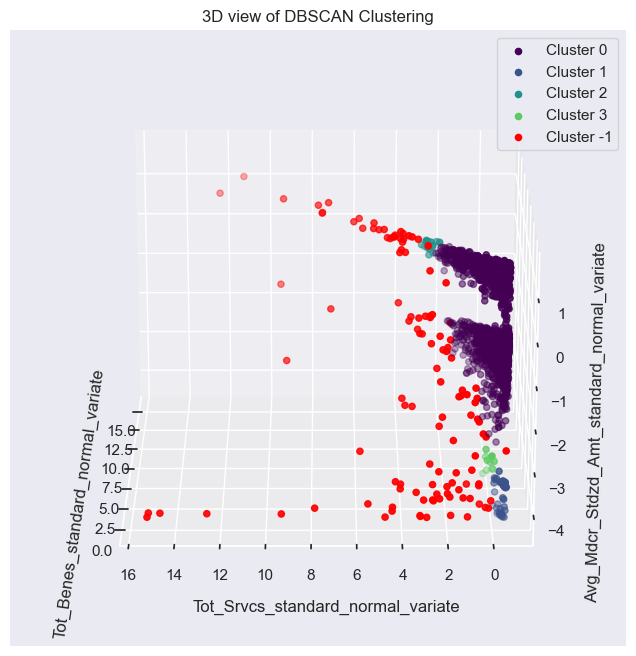

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Data extraction
X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

# DBSCAN Model
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan.fit(X)

# Labels for each point
data_for_var['Cluster_Label'] = dbscan.labels_
labels = dbscan.labels_

# Plotting setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=180)

# Plotting points with different colors for different clusters
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(set(labels)))]
for cls, col in zip(set(labels), colors):
    if cls == -1:  # Noise points
        col = [1, 0, 0, 1]  # Red color for noise
    cls_mask = (labels == cls)
    ax.scatter(X[cls_mask, 0], X[cls_mask, 1], X[cls_mask, 2], color=col, label=f'Cluster {cls}')

# Adding a legend
ax.legend()

# Axes labels
ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=10)

# Title
plt.title('3D view of DBSCAN Clustering')
plt.show()


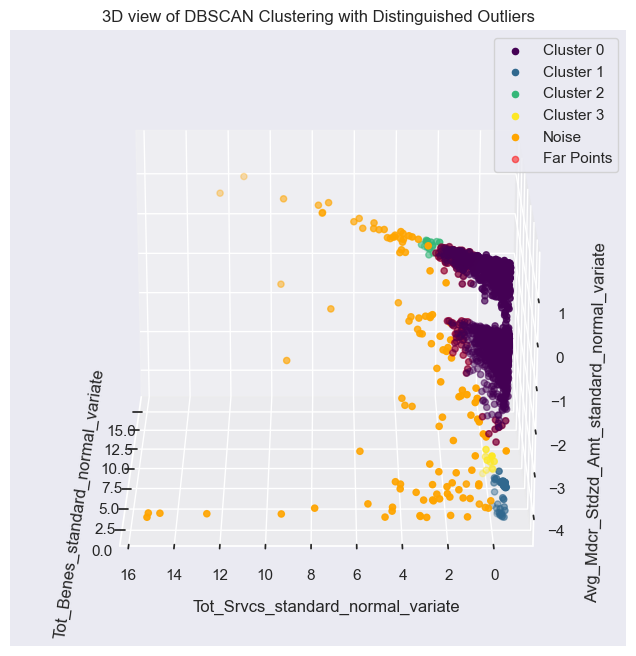

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestCentroid
from mpl_toolkits.mplot3d import Axes3D

# Data extraction
X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

# DBSCAN Model
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan.fit(X)

# Labels for each point
data_for_var['Cluster_Label'] = dbscan.labels_
labels = dbscan.labels_

# Calculate centroids of the clusters (excluding noise)
if len(set(labels) - {-1}) > 0:  # Check if there are any clusters
    centroid_calculator = NearestCentroid()
    clusters = X[labels != -1]  # Exclude noise points for centroid calculation
    cluster_labels = labels[labels != -1]
    centroid_calculator.fit(clusters, cluster_labels)
    centroids = centroid_calculator.centroids_

    # Calculate the distance of each point to its nearest centroid
    distances = np.sqrt(((clusters - centroids[cluster_labels]) ** 2).sum(axis=1))

    # Determine a threshold to identify points far from centroids
    threshold = np.percentile(distances, 95)

    # Identify points that are far from their centroids
    far_points = np.array([False] * len(X))  # Initialize the array for far points
    far_points[labels != -1] = distances > threshold  # Mark far points
else:
    centroids = []
    far_points = np.array([False] * len(X))

# Plotting setup
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=180)

# Define colors for clusters, using a colormap
colors = iter([plt.cm.viridis(each) for each in np.linspace(0, 1, len(set(labels) - {-1}))])  # Exclude -1 for color mapping

# Plotting points with different colors for different clusters
unique_labels = set(labels)
for cls in unique_labels:
    cls_mask = labels == cls
    if cls == -1:  # Noise points
        # Use red for noise points
        ax.scatter(X[cls_mask, 0], X[cls_mask, 1], X[cls_mask, 2], color='orange', label='Noise' if 'Noise' not in ax.get_legend_handles_labels()[1] else "")
    else:
        # Use colormap for cluster points
        col = next(colors)
        ax.scatter(X[cls_mask, 0], X[cls_mask, 1], X[cls_mask, 2], color=col, label=f'Cluster {cls}')

# Highlighting far points (distance-based outliers) 
ax.scatter(X[far_points, 0], X[far_points, 1], X[far_points, 2], c='red', marker='o',label='Far Points' if 'Far Points' not in ax.get_legend_handles_labels()[1] else "", alpha=0.5)
# Adding a legend to only show one label per category
ax.legend()

# Axes labels
ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=10)

# Title
plt.title('3D view of DBSCAN Clustering with Distinguished Outliers')
plt.show()

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Assuming data_for_var and other variables are already defined as per your previous code

# Add a column to indicate if a point is an outlier
data_for_var['Far_Point'] = far_points

# Initialize the outlier columns with NaN or some placeholder value
data_for_var['Outlier_Tot_Benes'] = np.nan
data_for_var['Outlier_Tot_Srvcs'] = np.nan
data_for_var['Outlier_Avg_Mdcr_Stdzd_Amt'] = np.nan

# Populate the outlier columns
for i, row in data_for_var.iterrows():
    if row['Far_Point']:
        data_for_var.at[i, 'Outlier_Tot_Benes'] = row['Tot_Benes_standard_normal_variate']
        data_for_var.at[i, 'Outlier_Tot_Srvcs'] = row['Tot_Srvcs_standard_normal_variate']
        data_for_var.at[i, 'Outlier_Avg_Mdcr_Stdzd_Amt'] = row['Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Now the CSV will have separate columns showing the outliers for each feature
data_for_var.to_csv('Dbscan_Data.csv', index=False)

In [14]:
data_for_var['Far_Point'] = far_points
print(data_for_var.head())

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt  \
0         28       32.0              581.89   
1         29       38.0              771.93   
2         11       12.0              562.18   
3         13       22.0              117.75   
4         12       16.0              588.58   

   Tot_Benes_standard_normal_variate  Tot_Srvcs_standard_normal_variate  \
0                          -0.112141                          -0.211364   
1                          -0.083824                          -0.108504   
2                          -0.593523                          -0.554231   
3                          -0.536889                          -0.382798   
4                          -0.565206                          -0.485658   

   Avg_Mdcr_Stdzd_Amt_standard_normal_variate  Cluster_Label  Far_Point  \
0                                   -0.124550              0      False   
1                                    1.229521              0      False   
2                                   -0.26

In [15]:
data_for_var.to_csv('Dbscan_data.csv',index=False)

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('original_data.csv')

# Select the relevant features for clustering
X = data[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']]

# Standardize the features (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your dataset characteristics
labels = dbscan.fit_predict(X_scaled)

# Identify points which form the core of a cluster
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Mark non-core points (considered as outliers in DBSCAN)
data['Far_Point'] = ~core_samples_mask

def inject_noise(data, columns, fraction=0.05, noise_level=0.05):
    poisoned_data = data.copy()
    num_rows = len(data)
    num_poisoned = int(num_rows * fraction)

    for col in columns:
        std_val = poisoned_data[col].std()
        noise = np.random.normal(0, std_val * noise_level, num_rows)
        indices = np.random.choice(poisoned_data.index, size=num_poisoned, replace=False)
        poisoned_data.loc[indices, col] += noise[indices]
    
    return poisoned_data

columns_to_add_noise = ['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

noised_data = inject_noise(data, columns_to_add_noise)

# Mark outliers in separate boolean columns
for col in columns_to_add_noise:
    noised_data[f'{col}_Outlier'] = noised_data['Far_Point']

print(noised_data.head())
noised_data.to_csv('noise_data_with_boolean_outliers.csv', index=False)

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt  \
0         28       32.0              581.89   
1         29       38.0              771.93   
2         11       12.0              562.18   
3         13       22.0              117.75   
4         12       16.0              588.58   

   Tot_Benes_standard_normal_variate  Tot_Srvcs_standard_normal_variate  \
0                          -0.112141                          -0.211364   
1                          -0.083824                          -0.108504   
2                          -0.593523                          -0.554231   
3                          -0.536889                          -0.382798   
4                          -0.565206                          -0.485658   

   Avg_Mdcr_Stdzd_Amt_standard_normal_variate  Far_Point  \
0                                   -0.124550      False   
1                                    1.229521      False   
2                                   -0.264987      False   
3                         

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('noise_data_with_boolean_outliers.csv')

# Apply K-Means clustering to identify far points as outliers
X = data[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']]

kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))
threshold = np.percentile(distances, 95)
far_points = distances > threshold

# Add a single new column to mark far points (outliers)
data['Is_Outlier'] = far_points

def inject_noise(data, columns, fraction=0.01, noise_level=0.05):
    poisoned_data = data.copy()
    num_rows = len(data)
    num_poisoned = int(num_rows * fraction)

    for col in columns:
        std_val = poisoned_data[col].std()
        noise = np.random.normal(0, std_val * noise_level, num_rows)
        indices = np.random.choice(poisoned_data.index, size=num_poisoned, replace=False)
        poisoned_data.loc[indices, col] += noise[indices]
    
    return poisoned_data

columns_to_add_noise = ['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

noised_data = inject_noise(data, columns_to_add_noise)

print(noised_data.head())
noised_data.to_csv('noise_data_with_outlier_0.01.csv', index=False)

   Tot_Benes  Tot_Srvcs  Avg_Mdcr_Stdzd_Amt  \
0         28       32.0              581.89   
1         29       38.0              771.93   
2         11       12.0              562.18   
3         13       22.0              117.75   
4         12       16.0              588.58   

   Tot_Benes_standard_normal_variate  Tot_Srvcs_standard_normal_variate  \
0                          -0.112141                          -0.211364   
1                          -0.083824                          -0.108504   
2                          -0.593523                          -0.554231   
3                          -0.536889                          -0.382798   
4                          -0.565206                          -0.485658   

   Avg_Mdcr_Stdzd_Amt_standard_normal_variate  Far_Point  \
0                                   -0.124550      False   
1                                    1.229521      False   
2                                   -0.264987      False   
3                         

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('noise_data_with_boolean_outliers.csv')

# Apply K-Means clustering to identify far points as outliers
X = data[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']]

kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))
threshold = np.percentile(distances, 95)
far_points = distances > threshold

# Add a single new column to mark far points (outliers)
data['Is_Outlier'] = far_points

def inject_extreme_values(data, columns, fraction=0.01, multiplier=10):
    poisoned_data = data.copy()
    num_rows = len(data)
    num_extreme = int(num_rows * fraction)
    
    for col in columns:
        # Determine the range for extreme values
        extreme_value_high = data[col].mean() + data[col].std() * multiplier
        extreme_value_low = data[col].mean() - data[col].std() * multiplier

        # Select indices for high extremes
        indices_high = np.random.choice(data.index, size=num_extreme // 2, replace=False)
        # Inject high extreme values
        poisoned_data.loc[indices_high, col] = extreme_value_high

        # Select indices for low extremes
        indices_low = np.random.choice(data.index, size=num_extreme - (num_extreme // 2), replace=False)
        # Inject low extreme values
        poisoned_data.loc[indices_low, col] = extreme_value_low
    return poisoned_data

# Specify the columns to inject extreme values into
columns_to_convert = ['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Inject extreme values into the specified columns
extreme_values_data = inject_extreme_values(cleaned_data, columns_to_convert)

# Print the head of the dataset with extreme values injected
print(extreme_values_data.head())
extreme_values_data.to_csv('extreme_data.csv',index=False)

NameError: name 'cleaned_data' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data if not already loaded
cleaned_data = pd.read_csv('original_data.csv')

# Apply K-Means clustering to identify far points as outliers
X = cleaned_data[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']]

kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))
threshold = np.percentile(distances, 95)
far_points = distances > threshold

# Add a single new column to mark far points (outliers)
cleaned_data['Is_Outlier'] = far_points

def inject_extreme_values(data, columns, fraction=0.10, multiplier=10):
    poisoned_data = data.copy()
    num_rows = len(data)
    num_extreme = int(num_rows * fraction)
    
    for col in columns:
        # Determine the range for extreme values
        extreme_value_high = data[col].mean() + data[col].std() * multiplier
        extreme_value_low = data[col].mean() - data[col].std() * multiplier

        # Select indices for high extremes
        indices_high = np.random.choice(data.index, size=num_extreme // 2, replace=False)
        # Inject high extreme values
        poisoned_data.loc[indices_high, col] = extreme_value_high

        # Select indices for low extremes
        indices_low = np.random.choice(data.index, size=num_extreme - (num_extreme // 2), replace=False)
        # Inject low extreme values
        poisoned_data.loc[indices_low, col] = extreme_value_low
        
    return poisoned_data

# Specify the columns to inject extreme values into
columns_to_convert = ['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Inject extreme values into the specified columns
extreme_values_data = inject_extreme_values(cleaned_data, columns_to_convert)

print(extreme_values_data.head())
extreme_values_data.to_csv('extreme_data_with_outliers_0.1.csv', index=False)

In [ ]:
# def reverse_trend(data, columns, start_index, end_index):
#     poisoned_data = data.copy()
#     for col in columns:
#         # Reverse the segment by reassigning it in reverse order
#         poisoned_data.loc[start_index:end_index, col] = poisoned_data.loc[start_index:end_index, col].iloc[::-1].values
#     return poisoned_data

# # Specify the columns and segment to reverse the trend in
# columns_to_convert = ['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']
# start_index = 0  # Starting index of the segment
# end_index = 3977    # Ending index of the segment

# # Reverse the trend in the specified segment and columns
# trend_reversed_data = reverse_trend(extreme_values_data, columns_to_convert, start_index, end_index)

# # Print the head of the dataset with the trend reversed
# print(trend_reversed_data.head())
# trend_reversed_data.to_csv('trend_data.csv',index=False)

def reverse_trend(data, columns, start_index, end_index, fraction=0.05):
    poisoned_data = data.copy()
    for col in columns:
        # Reverse the segment by reassigning it in reverse order
        # The fraction parameter is kept for potential future use but is not used in the current logic
        poisoned_data.loc[start_index:end_index, col] = poisoned_data.loc[start_index:end_index, col].iloc[::-1].values
    return poisoned_data

# Specify the columns and segment to reverse the trend in
columns_to_convert = ['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']
start_index = 100  # Starting index of the segment
end_index = 200    # Ending index of the segment

# Assume extreme_values_data is your DataFrame from previous operations
# Reverse the trend in the specified segment and columns
trend_reversed_data = reverse_trend(extreme_values_data, columns_to_convert, start_index, end_index)

# Print the head of the dataset with the trend reversed
print(trend_reversed_data.head())
trend_reversed_data.to_csv('trend_data.csv', index=False)


In [ ]:
def introduce_structural_break(data, columns, break_point, new_mean_multiplier=1.5, new_std_multiplier=2, fraction=0.01):
    poisoned_data = data.copy()
    for col in columns:
        # Calculate the new mean and standard deviation after the break point
        mean_val = poisoned_data[col].mean()
        std_val = poisoned_data[col].std()
        poisoned_data.loc[break_point:, col] = (poisoned_data.loc[break_point:, col] - mean_val) * new_std_multiplier + (mean_val * new_mean_multiplier)

    return poisoned_data

columns_to_convert = ['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']
break_point = 500  # Index for the structural break

# Introduce the structural break in the specified columns
structural_break_data = introduce_structural_break(trend_reversed_data, columns_to_convert, break_point)

# Print the head of the dataset with the structural break
print(structural_break_data.head())
structural_break_data.to_csv('structure_data.csv',index=False)

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('original_data.csv')

def generate_synthetic_data(data, columns, num_points=2000):
    synthetic_data = pd.DataFrame()
    for col in columns:
        mean_val = data[col].mean()
        std_val = data[col].std()
        synthetic_points = np.random.normal(mean_val, std_val, num_points)
        synthetic_data[col] = synthetic_points
    return synthetic_data

columns_to_convert = [ 'Tot_Benes', 'Tot_Srvcs', 'Avg_Mdcr_Stdzd_Amt','Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Sample data (you should replace this with your own data)
sample_data = pd.DataFrame({
    'Tot_Benes_standard_normal_variate': np.random.normal(100, 10, 1000),
    'Tot_Srvcs_standard_normal_variate': np.random.normal(50, 5, 1000),
    'Avg_Mdcr_Stdzd_Amt_standard_normal_variate': np.random.normal(50, 5, 1000),
    'Tot_Srvcs': np.random.normal(50, 5, 1000),
    'Tot_Benes': np.random.normal(50, 5, 1000),
    'Avg_Mdcr_Stdzd_Amt': np.random.normal(50, 5, 1000)
})

data1=data+sample_data
# Generating synthetic data
synthetic_data = generate_synthetic_data(data1, columns_to_convert)

# Concatenate original data with synthetic data
combined_data = pd.concat([data, synthetic_data], ignore_index=True)

# Save the combined data to a CSV file
print(combined_data.head())
combined_data.to_csv('combined_data.csv', index=False)

In [ ]:
poisoned_data_combined = pd.concat([noised_data, extreme_values_data, trend_reversed_data, structural_break_data, combined_data])
poisoned_data_combined.to_csv('Poisoned_data.csv', index=False)
poisoned_data_combined.head()

In [ ]:
# csv_file_path = 'Poisoned_data.csv'
# columns_to_convert = ['Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt']

# data = pd.read_csv(csv_file_path)

# for column in columns_to_convert:
#     data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

# data['monthly_average'] = data[columns_to_convert].mean(axis=1)
# data_for_poisoned = data[['Tot_Benes', 'Tot_Srvcs', 'Avg_Mdcr_Stdzd_Amt']]
# print(data_for_poisoned.head())

# data_for_var = data_for_poisoned.apply(pd.to_numeric, errors='coerce').dropna()

# print(data_for_poisoned.dtypes)

In [ ]:
csv_file_path = 'Poisoned_data.csv'
data = pd.read_csv(csv_file_path)

columns_to_convert = ['Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt']
# data['monthly_average'] = data[columns_to_convert].mean(axis=1)

for column in ['Tot_Benes', 'Tot_Srvcs', 'Avg_Mdcr_Stdzd_Amt']:
    data[f'{column}_standard_normal_variate'] = (data[column] - data[column].mean()) / data[column].std()

print(data[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].head())

<p style="text-align:center"> <b>-----------------Clustering of Poisoned Data------------------- </b></p>

In [ ]:
X = data[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the data
data['Cluster_Label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:")
print(centroids)

# Count the number of points in each cluster
for i in range(3):
    print(f"Cluster {i} has {sum(labels == i)} points.")

# Setting up the 3D plot with a specified figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=180)

# Plotting the data points and coloring them based on their cluster label
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')

# Plotting the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='k', s=100, linewidths=5, zorder=10)

# Adding a legend to indicate clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Labeling the axes
ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=10)

plt.title('3D view of K-Means Clustering on Standardized Data')
plt.show()

In [ ]:
X = data[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

data['Cluster_Label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate the distance of each point to its centroid
distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))

# Determine a threshold to identify points far from centroids
threshold = np.percentile(distances, 95)

# Identify points that are far from their centroids
far_points = distances > threshold

# Setting up the 3D plot with a specified figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=180)

# Plotting regular points
ax.scatter(X[~far_points, 0], X[~far_points, 1], X[~far_points, 2], c=labels[~far_points], cmap='viridis', marker='o')

# Highlighting points that are far from centroids
ax.scatter(X[far_points, 0], X[far_points, 1], X[far_points, 2], c='red', marker='o', label='Far Points')

# Adding centroids to the plot
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='k', s=100, linewidths=5, zorder=10)

# Adding a legend
ax.legend()

ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Avg_Mdcr_Stdzd_Amt_standard_normal_variate', labelpad=10)

plt.title('3D view of K-Means Clustering with Outliers Highlighted')
plt.show()

#-------------------------------------------------------------
# Add a column to indicate if a point is an outlier
data['Far_Point'] = far_points

# Initialize columns to indicate outliers for each feature
data['Outlier_Tot_Benes'] = np.nan
data['Outlier_Tot_Srvcs'] = np.nan
data['Outlier_Avg_Mdcr_Stdzd_Amt'] = np.nan

# Populate the outlier columns
for i, row in data.iterrows():
    if row['Far_Point']:
        # If the point is an outlier, populate the corresponding columns with its value
        data.at[i, 'Outlier_Tot_Benes'] = data.at[i, 'Tot_Benes_standard_normal_variate']
        data.at[i, 'Outlier_Tot_Srvcs'] = data.at[i, 'Tot_Srvcs_standard_normal_variate']
        data.at[i, 'Outlier_Avg_Mdcr_Stdzd_Amt'] = data.at[i, 'Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Save the updated DataFrame to a CSV file
data.to_csv('outlier_marked_data.csv', index=False)

In [ ]:
# # Flagging the far points in the dataframe
# data_for_poisoned ['Far_Point'] = far_points

# # Print the head of the dataframe to see the flags along with the data
# print(data_for_poisoned.head())
# Flagging the far points in the dataframe
data['Far_Point'] = far_points

# Print the head of the dataframe to see the flags along with the data
print(data.head())

In [ ]:
data.to_csv('outliner_poisoned_data.csv',index=False)
# data_for_poisoned.to_csv('outliner_poisoned_data.csv',index=False)

In [ ]:
# Flagging the far points in the dataframe
data_for_poisoned['Far_Point'] = far_points

# Initialize the outlier columns with NaN or some placeholder value
data_for_poisoned['Outlier_Tot_Benes'] = np.nan
data_for_poisoned['Outlier_Tot_Srvcs'] = np.nan
data_for_poisoned['Outlier_Avg_Mdcr_Stdzd_Amt'] = np.nan

# Populate the outlier columns based on the far_points
for i, row in data_for_poisoned.iterrows():
    if row['Far_Point']:
        data_for_poisoned.at[i, 'Outlier_Tot_Benes'] = row['Tot_Benes_standard_normal_variate']
        data_for_poisoned.at[i, 'Outlier_Tot_Srvcs'] = row['Tot_Srvcs_standard_normal_variate']
        data_for_poisoned.at[i, 'Outlier_Avg_Mdcr_Stdzd_Amt'] = row['Avg_Mdcr_Stdzd_Amt_standard_normal_variate']

# Print the head of the dataframe to see the flags along with the data
print(data_for_poisoned.head())

# Save the updated DataFrame to a CSV file
data_for_poisoned.to_csv('outliner_poisoned_data.csv', index=False)


**rough-----------------------------------------------------------------------------------------------------------------------**

In [ ]:
# Assume data_for_var contains a 'Provider_ID' column along with cluster labels
# Identify the smallest cluster as the outlier for demonstration purposes
outlier_cluster_label = data_for_var['Cluster_Label'].value_counts().idxmin()

# Flag providers in the outlying cluster
data_for_var['Outlier_Flag'] = data_for_var['Cluster_Label'] == outlier_cluster_label

# Now, providers in the outlying cluster have a True value in 'Outlier_Flag'


In [ ]:
# ... (after fitting KMeans and getting the centroids)

# Setting up the 3D plot with a specified figure size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Using a color map for clusters
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o')

# Adding centroids to the plot
for idx, centroid in enumerate(centroids):
    ax.scatter(*centroid, marker='x', color='k', s=100, linewidths=5, zorder=10)
    ax.text(*centroid, f'Centroid {idx+1}', color='red', fontsize='x-large')

# Adjusting the labels to be more visible by moving them closer to the ticks
ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
ax.set_zlabel('Monthly_average_standard_normal_variate', labelpad=10)

# Set the view for better visibility of the centroids
ax.view_init(elev=20, azim=60)  # Adjust the angle until all centroids are visible

plt.title('3D view of K-Means Clustering')
plt.show()


In [ ]:
outlying_cluster_label = data_for_var['Cluster_Label'].value_counts().idxmin()
data_for_var['Outlier_Flag'] = data_for_var['Cluster_Label'] == outlying_cluster_label

print(f"The outlying cluster is: Cluster {outlying_cluster_label}")
outlying_providers_head = data_for_var[data_for_var['Outlier_Flag']]
print("\nProviders in the outlying cluster (showing only head):")
print(outlying_providers_head.head())
# print (data_for_var)

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.cluster import KMeans
# import numpy as np
# import pandas as pd

# # Load the data for clustering
# data_for_var = pd.read_csv('Poisoned_data.csv')
# X = data_for_var[['Tot_Benes_standard_normal_variate', 'Tot_Srvcs_standard_normal_variate', 'monthly_average_standard_normal_variate']].values

# # Perform K-means clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(X)

# # Assign cluster labels
# data_for_var['Cluster_Label'] = kmeans.labels_
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# # Calculate the distance of each point to its centroid
# distances = np.sqrt(((X - centroids[labels]) ** 2).sum(axis=1))

# # Determine a threshold to identify points far from centroids
# threshold = np.percentile(distances, 95)

# # Identify points that are far from their centroids
# far_points = distances > threshold

# # Find range for axis limits
# max_x, max_y, max_z = np.max(X, axis=0)
# min_x, min_y, min_z = np.min(X, axis=0)

# # Set up the 3D plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # View angle
# ax.view_init(elev=20, azim=360)

# # Plotting regular points
# scatter = ax.scatter(X[~far_points, 0], X[~far_points, 1], X[~far_points, 2], 
#                      c=labels[~far_points], cmap='viridis', marker='o')

# # Highlighting points that are far from centroids
# ax.scatter(X[far_points, 0], X[far_points, 1], X[far_points, 2], 
#            c='red', marker='o', label='Far Points')

# # Adding centroids to the plot
# ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
#            marker='x', color='k', s=100, linewidths=5, zorder=10)

# # Adding a legend
# legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
# ax.add_artist(legend1)
# ax.legend()

# # Set the axes limits to start from zero
# ax.set_xlim([min_x, max_x])
# ax.set_ylim([min_y, max_y])
# ax.set_zlim([0, max_z])  # Explicitly setting the lower z-limit to 0

# # Labeling the axes
# ax.set_xlabel('Tot_Benes_standard_normal_variate', labelpad=10)
# ax.set_ylabel('Tot_Srvcs_standard_normal_variate', labelpad=10)
# ax.set_zlabel('monthly_average_standard_normal_variate', labelpad=10)

# # Title for the plot
# plt.title('3D view of K-Means Clustering with Far Points Highlighted')

# # Show the plot
# plt.show()

import pandas as pd

# Load the two CSV files
df1 = pd.read_csv('its_A_Test_Idiot.csv')
df2 = pd.read_csv('outlier_marked_data.csv')

# Specify the column names to compare
columns_to_compare = ['Outlier_Tot_Benes', 'Outlier_Tot_Srvcs', 'Outlier_Avg_Mdcr_Stdzd_Amt']

# Iterate through the columns and print out similarities
for column in columns_to_compare:
    common_values = pd.merge(df1[[column]], df2[[column]], on=column, how='inner').drop_duplicates()
    if not common_values.empty:
        print(f"Common values in {column}:")
        print(common_values)
    else:
        print(f"No common values found in {column}.")